In [111]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import glob
first_arr_loaded = True
for face_loc in glob.glob('known_faces/*png'):
    try:
        print(face_loc)
        image_ = face_recognition.load_image_file(face_loc)
        face_locations = face_recognition.face_locations(image_, model='small')
        x = image_.shape[0]
        y = image_.shape[1]
        loc = [(0,0,x,y)]
        face_encoding = face_recognition.face_encodings(image_, loc)[0]
        if first_arr_loaded:
            known_faces_arr = np.reshape(face_encoding, (-1,len(face_encoding)))
            first_arr_loaded = False
        else:
            known_faces_arr = np.append(known_faces_arr,  np.reshape(face_encoding, (-1,len(face_encoding))), axis = 0) 
    except:
        print(face_loc)
            

known_faces/Ni_Vur6bmLk_451_face_0.png
known_faces/murthi_3.png
known_faces/murthi_2.png
known_faces/murthi_1.png
known_faces/murthi_4.png


In [112]:
first_arr_loaded = True
failed = []
faces = []

for face_loc in glob.glob('faces/*png'):
    try:
        image_ = face_recognition.load_image_file(face_loc)
        x = image_.shape[0]
        y = image_.shape[1]
        loc = [(0,0,x,y)]
        face_encoding = face_recognition.face_encodings(image_, loc)[0]
        if first_arr_loaded:
            faces_arr = np.reshape(face_encoding, (-1,len(face_encoding)))
            first_arr_loaded = False
        else:
            faces_arr = np.append(faces_arr,  np.reshape(face_encoding, (-1,len(face_encoding))), axis = 0)
        faces.append(face_loc)
    except:
        failed.append(face_loc) 

In [113]:
similarity = face_recognition.face_distance(faces_arr,known_faces_arr[0])

In [117]:
similarity[similarity< 0.45]

array([0.4468114])

In [77]:
len(np.array(faces)[similarity < 0.45])

31

In [118]:
import matplotlib.pyplot as plt
image_ = []
for i in np.array(faces)[similarity < 0.45]:
    image_.append(face_recognition.load_image_file(i))
    


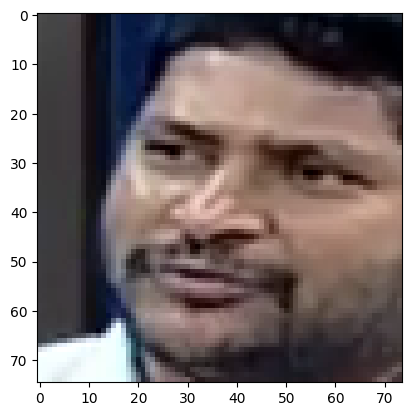

In [120]:
plt.imshow(image_[0])